In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# empty lists to fill with api weather info
cities_found = []
clouds = []
countries = []
dates = []
humid = []
latit = []
lngit = []
temps = []
wind = []

# count records and sets
count = 1
group_set = 1


print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# for loop to list append each city's data
for city in cities:  
    # try and except missing data
    try: 
        response_json = requests.get(f"{url}&q={city}").json() 
        clouds.append(response_json["clouds"]["all"])
        countries.append(response_json["sys"]["country"])
        dates.append(response_json["dt"])
        humid.append(response_json["main"]["humidity"])
        temps.append(response_json["main"]["temp_max"])
        latit.append(response_json["coord"]["lat"])
        lngit.append(response_json["coord"]["lon"])
        wind.append(response_json["wind"]["speed"])
        city_index = response_json["name"]
        if count >= 50:
            count = 1
            group_set += 1
            cities_found.append(response_json["name"])
        else:
            cities_found.append(response_json["name"])
            count += 1
        
        print(f"Processing Record {count} of Set {group_set} | {city}")
        
        #  pause loop for second to not exceed API usage
        time.sleep(1.01)
        
    except:
        print("City not found. Skipping...")
        
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 2 of Set 1 | gorontalo
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | chuy
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | dunedin
Processing Record 7 of Set 1 | mount pleasant
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | guangyuan
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | hasaki
Processing Record 12 of Set 1 | tual
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | mabaruma
City not found. Skipping...
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | labuhan
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | yaring
Processing Record 19 of Set 1 | kruisfontein
Processing Record 20 of Set 1 | north bend
Processing Record 21 of Set 1 | high level
Processing Record 22 of Set 1 | okhotsk
Processing Record 23 of Set 1 | brae
Processing Record 24

Processing Record 39 of Set 4 | shitanjing
Processing Record 40 of Set 4 | hambantota
Processing Record 41 of Set 4 | shelburne
Processing Record 42 of Set 4 | tanout
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | meulaboh
Processing Record 45 of Set 4 | sumisip
Processing Record 46 of Set 4 | livermore
Processing Record 47 of Set 4 | atambua
Processing Record 48 of Set 4 | wattegama
Processing Record 49 of Set 4 | ruidoso
Processing Record 50 of Set 4 | sijunjung
Processing Record 1 of Set 5 | tias
Processing Record 2 of Set 5 | mount gambier
Processing Record 3 of Set 5 | ixtapa
Processing Record 4 of Set 5 | muros
Processing Record 5 of Set 5 | imbituba
Processing Record 6 of Set 5 | sibolga
City not found. Skipping...
Processing Record 7 of Set 5 | codrington
Processing Record 8 of Set 5 | denpasar
Processing Record 9 of Set 5 | malindi
Processing Record 10 of Set 5 | gat
Processing Record 11 of Set 5 | poum
Processing Record 12 of Set 5 | maniitsoq

Processing Record 30 of Set 8 | pitimbu
Processing Record 31 of Set 8 | half moon bay
Processing Record 32 of Set 8 | derzhavinsk
City not found. Skipping...
Processing Record 33 of Set 8 | naze
Processing Record 34 of Set 8 | barabai
Processing Record 35 of Set 8 | victoria
Processing Record 36 of Set 8 | kushiro
Processing Record 37 of Set 8 | vangaindrano
Processing Record 38 of Set 8 | araucaria
Processing Record 39 of Set 8 | spearfish
Processing Record 40 of Set 8 | mackay
Processing Record 41 of Set 8 | pereira barreto
Processing Record 42 of Set 8 | luwuk
City not found. Skipping...
Processing Record 43 of Set 8 | stuttgart
Processing Record 44 of Set 8 | zeya
Processing Record 45 of Set 8 | kaitangata
Processing Record 46 of Set 8 | tromso
Processing Record 47 of Set 8 | ushtobe
City not found. Skipping...
Processing Record 48 of Set 8 | rio gallegos
Processing Record 49 of Set 8 | puerto escondido
Processing Record 50 of Set 8 | fairbanks
Processing Record 1 of Set 9 | brianc

City not found. Skipping...
Processing Record 19 of Set 12 | gamba
Processing Record 20 of Set 12 | dayong
Processing Record 21 of Set 12 | that phanom
Processing Record 22 of Set 12 | nyimba
Processing Record 23 of Set 12 | manokwari
Processing Record 24 of Set 12 | zamora
Processing Record 25 of Set 12 | luanda
Processing Record 26 of Set 12 | nishihara
Processing Record 27 of Set 12 | ahlat
Processing Record 28 of Set 12 | dudinka
Processing Record 29 of Set 12 | surskoye
Processing Record 30 of Set 12 | vyazma
Processing Record 31 of Set 12 | yarmouth
------------------------------
Data Retrieval Complete
------------------------------


In [4]:
# create dataframe out of cities found
cities_df = pd.DataFrame({"City": cities_found,
                          "Cloudiness": clouds,
                          "Country": countries,
                          "Date": dates,
                          "Humidity": humid,
                          "Lat": latit,
                          "Lng": lngit,
                          "Max Temp": temps,
                          "Wind Speed": wind})

# show value counts
cities_df.count()

City          580
Cloudiness    580
Country       580
Date          580
Humidity      580
Lat           580
Lng           580
Max Temp      580
Wind Speed    580
dtype: int64

In [5]:
# save dataframe to csv file
cities_df.to_csv("../Output_data/cities.csv")

# show header
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gorontalo,78,ID,1604691335,86,0.54,123.06,75.29,1.34
1,Mataura,3,NZ,1604691336,66,-46.19,168.86,49.69,3.74
2,Chui,30,UY,1604691337,74,-33.70,-53.46,67.62,14.54
3,Port Alfred,100,ZA,1604691339,84,-33.59,26.89,61.77,13.58
4,Dunedin,31,NZ,1604691150,66,-45.87,170.50,54.82,0.69


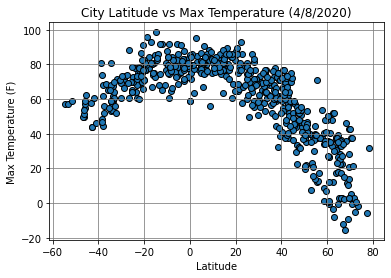

In [6]:
# scatter plot of max temperatures of city latitudes
x_values = cities_df["Lat"]
y_values = cities_df["Max Temp"]

plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (4/8/2020)")
plt.grid(color = "grey",)

In [7]:
# This plot marks the max temperatures of all the locations according to their latitudes. Naturally, the closer a city is to
# the equator, the hotter that city is. Also, the curve is skewed towards 10 degrees latitude, indicating there are far more
# cities in the northern hemisphere than southern.

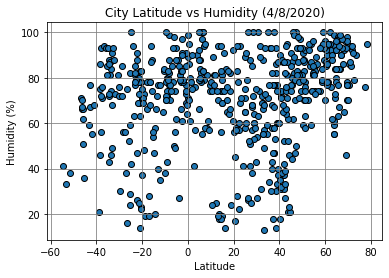

In [8]:
# scatter plot of humidity of city latitudes
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (4/8/2020)")
plt.grid(color = "grey",)

In [9]:
# Plotting city's humidity versus the latitude, this plot shows that there's no real connection between a city's humidity
# and it's latitude. If anything, cities near the equator are highly likely to have high humidity, but few conclusions can
# be taken.

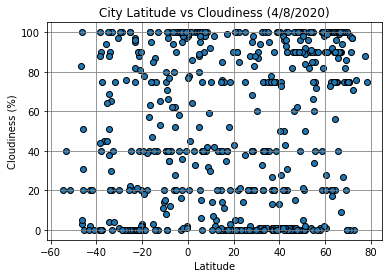

In [10]:
# scatter plot of cloudiness of city latitudes
x_values = cities_df["Lat"]
y_values = cities_df["Cloudiness"]

plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (4/8/2020)")
plt.grid(color = "grey",)

In [11]:
# Similar to the last plot, this one shows city cloudiness versus latitude and there's very little correlation between the
# two data.

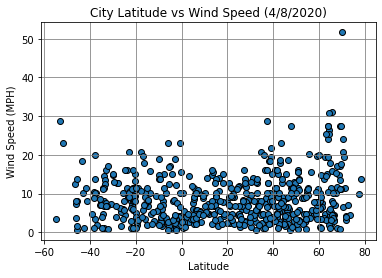

In [12]:
# scatter plot of wind speeds of city latitudes
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values, y_values, marker = "o", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("City Latitude vs Wind Speed (4/8/2020)")
plt.grid(color = "grey",)

In [13]:
# This plot shows wind speed against the city's latitude. Again, the data shows little correlation between the two data but
# the high-wind outliers are from high northern latitudes

The r value is: -0.8455155061268916.


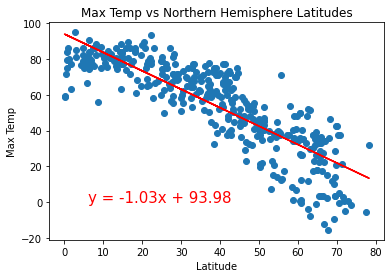

In [14]:
# scatter plot and regression line of northern hemisphere vs max temp
northern_df = cities_df.loc[(cities_df["Lat"] > 0),:]

x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temp vs Northern Hemisphere Latitudes")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r value is: {rvalue}.")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")
plt.show()

In [15]:
# The regression shows that there is a very strong negative correlation between max temperature and northern city latitude.
# The higher a city's latitude, the lower that city's temperature is. There is a large enough sample in this dataset to show
# a strong correlation.

The r value is: 0.7089927309745053.


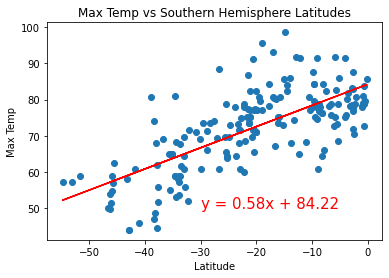

In [16]:
# scatter plot and regression line of southern hemisphere vs max temp
southern_df = cities_df.loc[(cities_df["Lat"] < 0),:]

x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Max Temp vs Southern Hemisphere Latitudes")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r value is: {rvalue}.")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.show()

In [17]:
# There is a strong positive correlation between southern hemisphere cities and their max temps. But the correlation is only
# .709 compared to -.846 for the northern hemisphere dataset. My inference is that this dataset is a little bit smaller, but
# also cities in the southern hemisphere aren't in as extreme conditions as cities in the northern hemisphere.

The r value is: 0.24778986862063065.


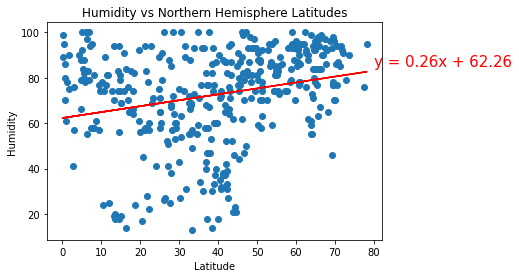

In [26]:
# scatter plot and regression line of northern hemisphere vs humidity
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Northern Hemisphere Latitudes")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r value is: {rvalue}.")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,85),fontsize=15,color="red")
plt.show()

In [ ]:
# The regression shows a small positive correlation of humidity to city's latitude. Surprisingly though, the higher latitudes
# have more humidity, which is unintuitive. However, it is probably statistical noise and insignificant.

The r value is: 0.1722237617050018.


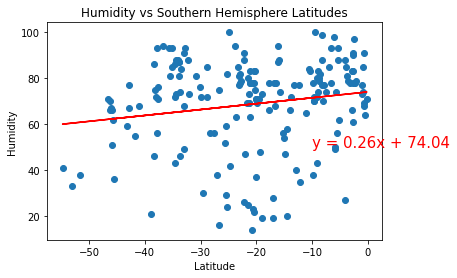

In [28]:
# scatter plot and regression line of southern hemisphere vs humidity
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs Southern Hemisphere Latitudes")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r value is: {rvalue}.")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,50),fontsize=15,color="red")
plt.show()

In [ ]:
# Similar to the last regression, there is a tiny correlation between souther hemisphere cities' latitudes and their recorded
# humidity. However, this is a negative correlation because the humidity is slightly higher in cities closer to the equator,
# whereas the humidity is higher on aggregate in cities further from the equator in the northern hemisphere. Nonetheless,
# there is not much information to be pulled from such a small regression.

The r value is: 0.20649328614700438.


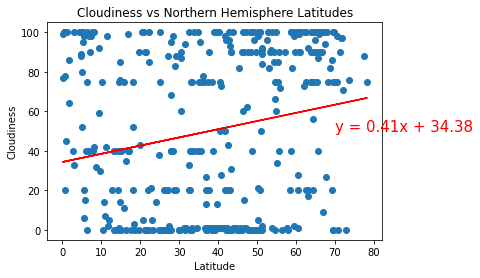

In [20]:
# scatter plot and regression line of northern hemisphere vs cloudiness
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Northern Hemisphere Latitudes")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r value is: {rvalue}.")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,50),fontsize=15,color="red")
plt.show()

In [ ]:
# There is a small positive correlation between cloudiness and northern latitude, again, not much can be taken from the
# correlation. However, the slope of the regression line is steeper, suggesting heavy variance between each data point. That
# makes sense anecdotally, considering how many plotted points are either 100% cloudiness or 0%.

The r value is: 0.2026415671104553.


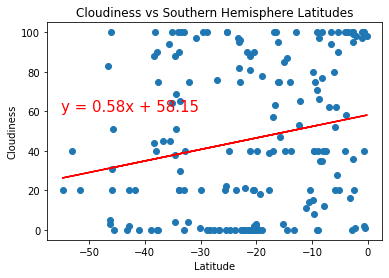

In [21]:
# scatter plot and regression line of southern hemisphere vs cloudiness
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs Southern Hemisphere Latitudes")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r value is: {rvalue}.")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.show()

In [ ]:
# This plot and regression is nearly identical to the last one except this correlation goes towards the equator, not away
# from it like the last regression. There is an even steeper regression slope, indicating greater variance than northern
# hemisphere. That stands to reason seeing that the southern hemisphere is a smaller dataset.

The r value is: 0.2489448560873113.


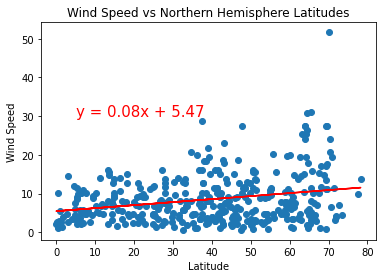

In [22]:
# scatter plot and regression line of northern hemisphere vs wind speed
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Northern Hemisphere Latitudes")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r value is: {rvalue}.")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.show()

In [ ]:
# The regression line is almost 0, showing that aside from one outlier around 50 mph, there is almost no variance in wind
# speed. There is a small positive correlation with latitude.

The r value is: -0.1428454883896555.


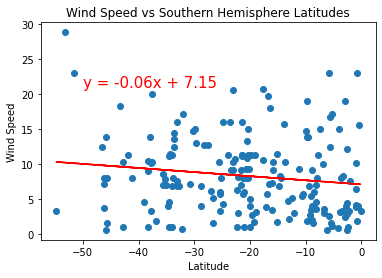

In [23]:
# scatter plot and regression line of northern hemisphere vs wind speed
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs Southern Hemisphere Latitudes")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The r value is: {rvalue}.")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,21),fontsize=15,color="red")
plt.show()

In [ ]:
# Just like the last plot and regression, wind speed is very slightly correlated to more extreme latitudes and there is very
# little variance. Wind speed seems to be a stable metric compared to the rest of the weather data.